# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
requests_btc = requests.get(btc_url)
requests_eth = requests.get(eth_url)

In [6]:
# Fetch current BTC price
data_btc = requests_btc.json()

df_btc = data_btc['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
data_eth = requests_eth.json()

df_eth = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * df_btc
my_eth_value = my_eth * df_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $20381.16
The current value of your 5.3 ETH is $2887.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [8]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                            open    high      low   close   volume    open   
2020-10-14 00:00:00-04:00  118.1  118.11  117.985  118.04  3292758  350.75   

                                                             
                             high     low   close    volume  
2020-10-14 00:00:00-04:00  351.93  347.14  347.97  47156216

In [10]:
# Pick AGG and SPY close prices
agg_close_prices = float(df_portfolio["AGG"]["close"])
spy_close_prices = float(df_portfolio["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_prices}")
print(f"Current SPY closing price: ${spy_close_prices}")

Current AGG closing price: $118.04
Current SPY closing price: $347.97


In [11]:
# Compute the current value of shares

my_agg_value = agg_close_prices * my_agg
my_spy_value = spy_close_prices * my_spy
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17398.50
The current value of your 200 AGG shares is $23608.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame

# Create savings DataFrame
crypto_data = {"amount": [my_btc_value + my_eth_value]}
column = ["crypto"]
df_crypto = pd.DataFrame(crypto_data , index = column)
shares_data = {"amount": [my_agg_value + my_spy_value]}
column = ["shares"]
df_shares = pd.DataFrame(shares_data , index = column)
# Display savings DataFrame
df_savings = pd.concat([df_crypto, df_shares] , axis = "rows" , join = "inner")
df_savings


,amount
crypto,23268.45185
shares,41006.50000


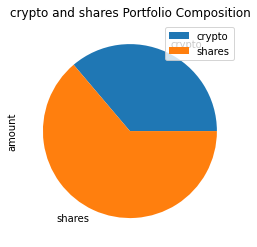

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="crypto and shares Portfolio Composition")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
Total_savings = df_savings.sum()

# Validate saving health
if Total_savings[0] > emergency_fund:
     print(f' Congratulatings! you have enough money in your emergency fund.')
if Total_savings[0] == emergency_fund:
     print(f' Congratulatings! you reach your financial goal.')
if Total_savings[0] < emergency_fund:
     print(f' You are away of amout from your financial goal.')

 Congratulatings! you have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-14', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
stock = ["AGG", "SPY"]
timeframe = "1D"
stock_data = alpaca.get_barset(
    stock,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562.0   

                              SPY                                      
                             open    high       low   close    volume  
2015-10-14 00:00:00-04:00  200.18  200.87  198.9400  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.6400  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.9200  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.1300  203.33  61255929  
2015-10-20 00:00:00-04:00  202.85  203.84  202.5471  203.07  60081395

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.87  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998422,1.005836,0.998724,1.000097,0.985765,1.005303,1.002204,0.998344,1.005089,0.992449,...,0.997661,0.992118,1.004715,0.997564,0.999466,1.017239,0.997566,0.996804,1.004436,0.985769
2,0.999486,1.002171,1.001055,1.003009,0.983968,1.015686,1.002444,1.004036,0.995544,0.985370,...,1.000115,0.986916,1.006487,1.001835,1.002843,1.007146,1.005479,1.004722,0.999157,0.985199
3,0.994846,0.997181,1.011148,1.009873,0.988190,1.019028,0.996036,1.006873,1.002860,0.975466,...,0.996795,0.986858,1.011613,1.009319,1.001801,1.008551,1.008657,1.002331,0.993172,0.987374
4,0.989731,1.007780,1.013161,1.025794,0.981631,1.016651,0.991491,1.003745,1.006278,0.978814,...,0.996101,0.990382,1.015443,1.006670,1.008004,1.019731,1.003402,1.003361,0.990441,0.986244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.280558,5.666377,6.180718,12.846522,5.331511,11.973172,4.451893,10.882696,12.345710,6.966612,...,13.039979,12.776419,7.075622,5.227604,4.860452,1.940170,2.979221,13.295570,14.229774,12.576311
7557,4.347223,5.686490,6.208311,12.832249,5.365839,11.930125,4.489623,10.883806,12.399797,6.943369,...,12.993418,12.720082,7.089098,5.262928,4.796021,1.939176,2.971907,13.272647,14.277818,12.667028
7558,4.327585,5.673908,6.196064,12.838291,5.413019,12.001590,4.538184,10.830340,12.391369,6.890054,...,12.966655,12.720661,7.117893,5.312242,4.815763,1.922078,2.930355,13.209649,14.174778,12.625186
7559,4.260743,5.639990,6.135957,12.720699,5.379372,11.967060,4.534849,10.922240,12.317425,6.891982,...,13.017892,12.646562,7.029951,5.329593,4.791104,1.915337,2.914615,13.288119,14.290897,12.605960


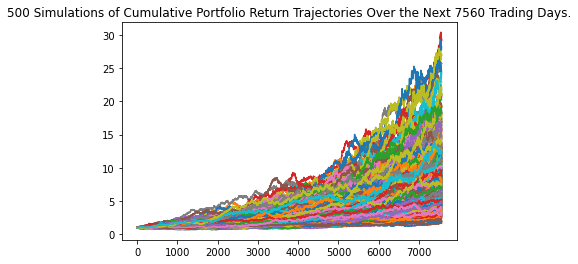

In [20]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

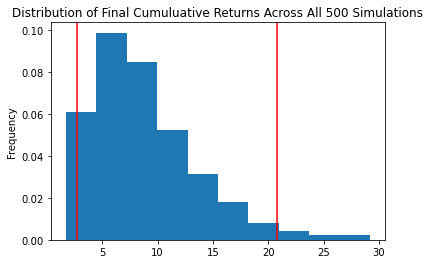

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_30_year.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean              8.801062
std               4.705016
min               1.694423
25%               5.264221
50%               7.740503
75%              11.386620
max              29.215294
95% CI Lower      2.690532
95% CI Upper     20.756550
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53810.64 and $415131.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $80715.96 and $622696.51


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007925,1.002314,1.004276,1.001076,1.001987,0.992180,0.995365,1.008959,0.999832,0.993908,...,0.995264,1.000916,1.007270,1.000439,0.998150,1.004477,0.998016,0.993770,0.997778,0.999964
2,1.002015,1.004596,1.013481,0.999920,1.003821,0.986587,1.000128,1.006899,0.992232,0.996164,...,0.995669,1.008007,1.006853,0.996994,0.999599,1.000528,0.989856,1.002616,0.992219,1.000676
3,1.000531,1.004362,1.019163,1.009884,1.003656,0.990038,0.994475,1.011629,0.985592,0.994611,...,0.997502,1.000477,1.011398,0.996159,0.988551,1.001242,0.976403,0.998328,0.993711,1.009525
4,1.005123,1.012091,1.028486,1.011383,1.002040,1.000482,0.996768,1.019545,0.999218,0.993249,...,0.992552,0.995930,1.016446,1.003231,0.979822,1.000506,0.977616,0.990960,0.991777,1.019997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.960319,1.485142,1.338250,2.184951,1.758644,1.442396,1.913504,1.025691,1.280740,1.020821,...,1.978232,1.430459,1.184219,1.488125,1.351025,1.292860,1.191413,0.998497,1.266670,2.532296
1257,0.962191,1.489280,1.351929,2.207787,1.754298,1.461431,1.917748,1.032381,1.289960,1.023981,...,1.982160,1.427494,1.179187,1.481250,1.368985,1.283369,1.183250,1.006756,1.258120,2.524980
1258,0.961858,1.485508,1.362337,2.194576,1.750259,1.462877,1.912817,1.030550,1.287205,1.025845,...,1.980241,1.435160,1.179034,1.485796,1.377580,1.292784,1.184265,1.010182,1.260501,2.533273
1259,0.959666,1.485883,1.353268,2.188634,1.758228,1.462904,1.932656,1.011513,1.290634,1.031437,...,1.980476,1.427743,1.188613,1.492306,1.377158,1.303789,1.180782,1.015753,1.275002,2.535788


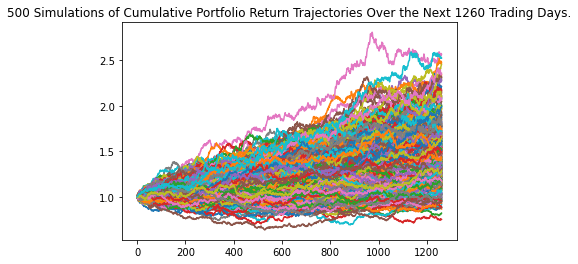

In [27]:
# Plot simulation outcomes
line_plot = MC_5_year.plot_simulation()

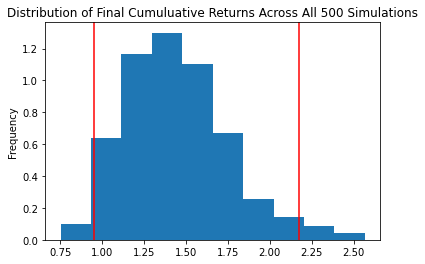

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_year.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.442801
std               0.313415
min               0.751218
25%               1.218797
50%               1.401180
75%               1.620579
max               2.566925
95% CI Lower      0.951721
95% CI Upper      2.171711
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57103.24 and $130302.64


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995470,0.999007,0.996628,0.995316,0.998231,0.997799,1.001148,1.007621,1.001235,1.000898,...,0.998995,0.988197,1.014650,0.994532,0.995385,1.003914,1.005116,0.992575,1.001007,0.995570
2,0.992567,0.996192,1.000376,0.994595,1.001021,1.002423,1.000374,1.011657,0.998243,0.995277,...,0.998489,0.996834,1.017652,0.993682,0.989681,0.996828,1.010202,0.996708,0.992382,0.994092
3,0.998550,1.003333,1.003935,0.990230,0.997841,1.009904,0.997472,1.008636,0.981770,1.008196,...,1.004840,0.992052,1.019166,0.993416,0.985356,1.001006,1.004007,0.992568,0.998679,0.989646
4,0.990380,1.003794,1.009208,0.993297,0.989722,1.017596,0.989261,1.008478,0.980351,1.008354,...,1.014505,0.986802,1.021086,0.992695,0.983877,1.002391,0.997725,0.997489,1.004300,0.987983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.260722,2.167416,1.710061,1.738731,2.193593,2.307465,1.630984,1.719276,1.954991,0.857216,...,2.144210,0.905828,2.981418,2.211232,2.924692,3.375437,1.980257,1.221031,1.619693,1.447795
2517,3.246244,2.158103,1.723407,1.745704,2.182922,2.314071,1.633933,1.738303,1.957253,0.859322,...,2.169295,0.910167,2.978751,2.242432,2.931291,3.360742,1.972810,1.220538,1.623646,1.448880
2518,3.246477,2.151359,1.725739,1.741003,2.180840,2.299846,1.629369,1.749609,1.952765,0.856516,...,2.171472,0.907790,3.006895,2.220479,2.920380,3.390873,1.966378,1.208476,1.633925,1.442486
2519,3.233012,2.145807,1.703313,1.735573,2.181544,2.318329,1.637637,1.750450,1.968948,0.851828,...,2.182411,0.920718,2.999761,2.234830,2.915068,3.400044,1.961344,1.199393,1.629484,1.459673


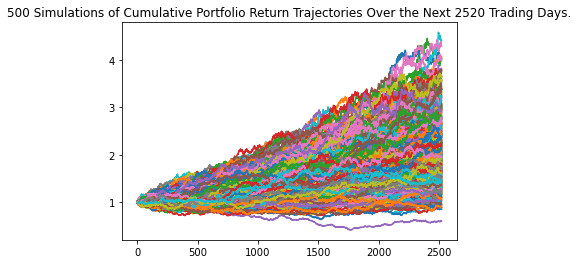

In [33]:
# Plot simulation outcomes
line_plot = MC_10_year.plot_simulation()

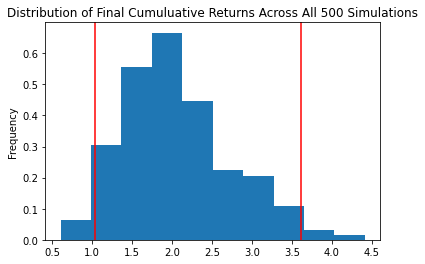

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_year.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.066569
std               0.669836
min               0.602404
25%               1.608980
50%               1.955836
75%               2.431811
max               4.415673
95% CI Lower      1.030849
95% CI Upper      3.609118
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61850.96 and $216547.07
